# **Ejericio 1 - Clasificación de numeros MNIST**

Importamos la librería Tensowflow. Para hacer uso de Keras, lo haremos de la siguiente manera: tf.keras

In [ ]:
import tensorflow as tf

Precarga de los datos en Keras. En Keras el conjunto de datos **MNIST** se encuentran precargado en forma de cuatro *arrays* Numpy y se pueden obtener con el siguiente código:

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


*x_train* y *y_train* conforman el conjunto de entrenamiento, mientras que *x_test* y *y_test* contienen los datos para el test. Las imágenes se encuentran codificadas como arrays Numpy y sus correspondientes etiquetas (labels) van desde 0 hasta 9

## Representar un número

Si queremos comprobar qué valores hemos cargado, podemos elegir cualquiera de las imágenes del conjunto **MNIST**, por ejemplo la imagen 8 usando el siguiente código Python:

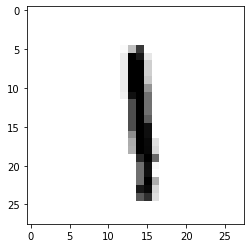

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[8], cmap=plt.cm.binary)

Para ver su correspondiente etiqueta (label) podemos hacerlo mediantes:

In [ ]:
print(y_train[8])

1


## **Representación de datos en Keras**

Keras usa un *array* multidimensional de Numply como estructura básica de datos, le llama a esta estructura de datos **tensor**. De manera resumida podríamos decir que un **tensor** tiene tres atributos principales:


*   **Número de ejes** (*Rank* o *ndim*): Un tensor que contiene un solo número lo llamaremos *scalar*(o un tensor 0-dimensional, o tensor **0D**). Un *array* de números lo llamamos vector, o tensor **1D**. Un array de vectores será una matriz (*matrix*), o tensor **2D**. Si empaquetamos esta matriz en un nuevo  *array*, obtenemos un tensor **3D**. que podemos interpretarlo visualmente como un cubo de números. Empaquetamos un tensor **3D** en un *array*, para crear un tensor **4D**, y así sucesivamente. En la librería Numpy de Python esto se llama *ndim* del tensor
*   **Forma** (*shape*): se trata de una tupla de enteros que describen cuantas dimensiones tiene el tensor en cada eje. Un vector tiene un *shape* con un único elemento, por ejemplo "(5,)", mientras que un *escalar* tiene un *shape* vacío "()". En la librería Numpy esta atributo se llama *shape*
*    **Tipo de datos** (*data type*): Este atributo indica el tipo de datos que contiene el tensor, que pueden ser por ejemplo *uint8,float32,float64,*etc. En raras ocasiones tenemos en nuestro contexto, tendores de tipo *char* (nunca *string*). En la librería Numpy este atributo se llama *dtype*

Ahora obtendremos el **número de ejes, dimensiones del tensor y el tipo de dato que contiene** *train_images*


In [ ]:
print(x_train.ndim)

3


In [ ]:
print(x_train.shape)

(60000, 28, 28)


*   Primer valor (*60000*): Hace referencia al número de ejemplos alojados en *x_train*
*   Segundo valor y tercer valor: Como cada ejemplo del dataset es una imagen binaria. Ésta, esta formada por una matriz de *28* por *28* elementos
Por ejemplo, para seleccionar el valor la primera celda de la imagen 10 haremos lo siguiente:

In [ ]:
print(x_train[10][1][1])

0


In [ ]:
print(x_train.dtype)

uint8


## **Normalización de los datos de entrada**

Estas imágenes de MNIST de 20x20 píxeles e representan como una matriz de números cuyos valores van entre [0,255] de tipo *uint8*. Es habitual escalar los valores de entrada de las redes neuronales a unos rangos determinados. En ese ejercicio, los valores de entrada conviene escalarlos a vlaores de tipo *float32* dentro del intervalo [0,1]

In [ ]:
'''Solo le cambiamos el tipo a la x porque la y es la salida'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

Por otro lado, para facilitar la entrada de datos a nuestra red neuronal. Debemos hacer una transformación del tensor **2D** a un tensor **1D** (vector). Es decir, la matriz de 28x28 números se puede representar con un vector (*array*) de 784 números (concatenando fila a fila), que es el formato que acepta como entrada una red neuronal densamente conectada.

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [ ]:
print("Estructura x_train:{}".format(x_train.shape))
print("Estructura x_test:{}".format(x_test.shape))

Estructura x_train:(60000, 784)
Estructura x_test:(10000, 784)


Además tenemos las etiquetas (*labels*) para cada dota de entrada. En este ejercicio, vamos a representar esta etiqueta con un vector de 10 posiciones, donde la posición correspondiente al dígito que representa  la imagen contiene 1 y el resto de posiciones del vector contienen el valor 0. Para ello udaremos lo que se conoce como *one-hot econding* (se explicará en ejercicios posteriores). En resumen, consiste en transformar las etiquetas de un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que lee corresponde al valor de la etiqueta. Keras ofrece muchas funciones de sopoerte, y entre ellas *to_categorical* para realizar esta transformación, que lo podemos importar así:

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
print(y_test[0])
print(y_test.shape)
print(y_train[0])
print(y_train.shape)

7
(10000,)
5
(60000,)


In [ ]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
print(y_test[0])
print(y_test.shape)
print(y_train[0])
print(y_train.shape)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)


Ahora ya tenemos los datos praparados para ser usados en nuestro ejercicio de modelo simple que vamos a programar en Keras en la próxima sección

## **Redes desnsamente conectadas en Keras**

### Clase *Sequential* en Keras

La estructura de datos principal en keras es la clase *Sequential*, que permite la creci´n de una red neuronal básica.
La clase *Sequential* de la librería de Keras es una envoltura para el modelo de red neuronal secuencial que ofrece Keras y se puede crear de la siguiente manera:

In [ ]:
from tensorflow.keras.models import Sequential
model = Sequential()

En este caso, el modelo de Keras se considera como una secuencia de capas que cada una de ellas va "destilando" gradualmente los datos de entrada para obtener la salida deseada. En Keras podemos concontrar todo los tipos de capas requeridas y se pueden agregar fácilmente al modelo mediante el método *add()*

### Definición del modelo

La construcción en Keras de nuestro modelo para reconocer las imágenes de dígitos podría serl el siguiente:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Aquí, la red neuronal se ha definido como una secuencia de dos capas que están densamente conectadas, es decir, que todas las neuronas de cada capa están conectadas con todas las neuronas de la capa siguiente (el primer parámetro de Dense representa el número de nodos o neuronas de la capa a crear). Visualmente podríamos representarlo de la siguiente manera:

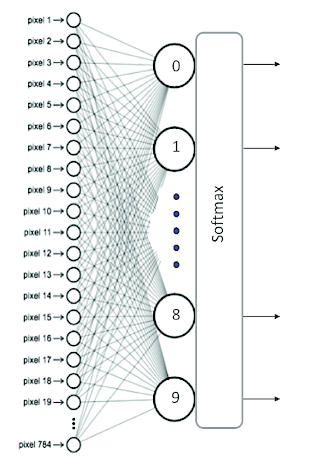

En el código anterior expresamos explícitamente en el argumento *input_shape* de la primera capa cómo son los datos de entrada: un tensor que indica que tenemos 784 *features* del modelo (en relalidad el tensor que se está drfiniendo es de (None,784,) como veremos más adelante).

Una característica muy interesante de la librería de Keras es que esta
deducirá automáticamente la forma de los tensores entre capas después de la
primera. Esto significa que el programador solo tiene que establecer esta información para la primera de ellas. Además, para cada capa indicamos el número de nodos que tiene y la función de activación que aplicaremos en ella (en este caso, sigmoid).

La segunda capa es una capa softmax de 10 neuronas, lo que significa que
devolverá una matriz de 10 valores de probabilidad que representan a los 10
dígitos posibles (en general, la capa de salida de una red de clasificación
tendrá tantas neuronas como clases, menos en una clasificación binaria, en
donde solo necesita una neurona). Cada valor será la probabilidad de que la
imagen del dígito actual pertenezca a cada una de ellas.

Un método muy útil que proporciona Keras para comprobar la arquitectura
de nuestra modelo es summary():

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


El método *summary()* resulta muy valisoso, ya que nos brindará información sobre el número de parámetros y tamaños de los datos que tiene la red neuronal cuando empezamos a construir modelos de redes muy grandes. Para nuestro ejemplo simple,
vemos que indica que se requieren 7 960 parámetros (columna Param #), que
corresponden a los 7 850 parámetros para la primera capa y 110 para la
segunda.

En la primera capa por cada neurona i (entre 0 y 9) requerimos 784
parámetros para los pesos wij y por tanto 10 x 784 parámetros para almacenar
los pesos de las 10 neuronas. Además de los 10 parámetros adicionales para
los 10 sesgos bj correspondientes a cada una de ellas. En la segunda capa, al ser una función softmax, se requiere conectar todos sus 10 nodos con los 10 nodos de la capa anterior, y por tanto se requieren 10x10 parámetros wi además de los correspondientes 10 sesgos bj correspondientes a cada nodo.

### Configuración del proceso de aprendizaje

Una vez que tengamos nuestro modelo definido a partir de *Sequential* y el método *add()*, podemos configurar cómo será su proceso de aprendizaje con el método *complile()*, con el que podemos especificar algunas propiedades a través de argumentos del método.

El primero de estos argumentos es la función de *loss* que usaremos para
evaluar el grado de error entre salidas calculadas y las salidas deseadas de los
datos de entrenamiento. Por otro lado, se especifica un optimizador que,
como veremos, es la manera que tenemos de especificar el algoritmo de
optimitzaación que permite a la red neuronal calcular los pesos de los
parámetros a partir de los datos de entrada y de la función de *loss* definida.

Y finalmente debemos indicar la métrica que usaremos para monitorizar el
proceso de aprendizaje (y prueba) de nuestra red neuronal. En este primer
ejemplo solo tendremos en cuenta la *accuracy* (fracción de imágenes que son
correctamente clasificadas). Por ejemplo, en nuestro caso podemos
especificar los siguientes argumentos en método *compile()* para probarlo:

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

Donde especificamos que la función de *loss* es *categorical_crossentropy*, el optimizador usado es el *stocastic gradient desccent (sgd)* y la métrica es *accuracy*, con la que evaluaremos el porcentaje de aciertos averiguando dónde el modelo predice la etiqueta correcta

### Entrenamiento del modelo

Una vez definido nuestro modelo y configurado su método de aprendizaje,
este ya está listo para ser entrenado. Para ello podemos entrenar o “ajustar”
el modelo a los datos de entrenamiento de que disponemos invocando al
método *fit()* del modelo:

In [ ]:
model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
600/600 [==============================] - 2s 2ms/step - loss: 1.8608 - accuracy: 0.4276
Epoch 2/5
600/600 [==============================] - 1s 2ms/step - loss: 1.4379 - accuracy: 0.6817
Epoch 3/5
600/600 [==============================] - 1s 2ms/step - loss: 1.2213 - accuracy: 0.7289
Epoch 4/5
600/600 [==============================] - 1s 2ms/step - loss: 1.0734 - accuracy: 0.7589
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.9676 - accuracy: 0.7738


Donde en los dos primeros argumentos hemos indicado los datos con los que
entrenaremos el modelo en forma de *arrays* Numpy. Con el argumento
*batch_size* se indica el número de datos que usaremos para cada actualización
de los parámetros del modelo y con *epochs* estamos indicando el número de
veces que usaremos todos los datos en el proceso de aprendizaje. Estos dos
últimos argumentos se explicarán con mucho más detalle en próximos ejemplos.

A grandes rasgos,en cada iteración de este algoritmo, este coge datos de entrenamiento de *x_train*, los pasa a través de la red neuronal (con los valores que en aquel momento tengan sus parámetros), compara el resultado obtenido con el esperado (indicado en *y_train*) y calcula la *loss* para guiar el proceso de ajuste de los parámetros del modelo, que intuitivamente consiste en aplicar el optimizador especificado anteriormente en el método *compile()* para calcular un nuevo valor de cada uno de los parámetros (pesos y sesgos) del modelo en cada iteración de tal forma que se reduzca el de la *loss*.


Este método, retorna un objeto *History* que hemos omitido en este ejemplo. Su atributo *History.history* es el registro de los valores de *loss* para los datos de entrenamiento y resto de métricas en sucesivas *epochs*, así como otras métricas para los datos de validación si se han especificado. Más adelante, se verá lo valioso de este información para evitar por ejemplo el sobreajuste del modelo.

### Evaluación del modelo

En este punto ya se ha entrenado la red nuronal y ahora se puede evalurar cómo se comporta con datos nuevos de prueba (*test*) con el método *evaluate()*. Este devuelve dos valores:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8978 - accuracy: 0.7762


Que indican cómo de bien o mal se comporta nuestro modelo con datos nuevos que nunca ha visto (que hemos almacenado en *x_test* e *y_test* cuando hemos realizado el *mnist.load_data()*. De momento fijémonos solo en uno de ellos, la *accuracy*:

In [ ]:
print('Test accuracy:', test_acc)

Test accuracy: 0.776199996471405


Que nos está indicando el porcentage de clasificaciones correctos que ha realizado a datos nunca vistos.

En el mundo de Machine Learning una herramienta para avaluar modelos es l matriz de confusión (*confusion matrix*), una tabla con filas y columnas que contabilizan las predicciones en comparación con los valores realis. Usamos esta tabla para entender mejor cómo de bien el modelo se comporta y es muy útil para mostrar de forma explícita cuando una clase es confundida con otra. Una matriz de confusión para un clasificador binario  como el explicado al principio tiene esta estructura:


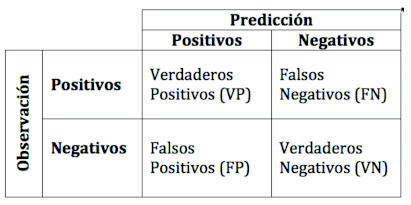

En la que:


*   VP es la cantidad de positivos que fueron clasificados correctamente
como positivos por el modelo
*   VN es la cantidad de negativos que fueron clasificados correctamente
como negativos por el modelo.
*   FN es la cantidad de positivos que fueron clasificados incorrectamente como negativos
*   FP es la cantidad de negativos que fueron clasificados incorrectamente como positivos.

Con esta matriz de confusión, la *accuracy* se puede calcular sumando los valores de la diagonal y divido por el total: 

***Accuracy* = (VP + VN) / (VP + FP + VN + TN)**

Ahora bien, la *accuracy* puede ser engañosa en la calidad del modelo porque al medirla para el modelo concreto no distinguimos entre los erroes de tipo falso positivo y falso negativo, como si ambos tubieran la misma importancia.

Por ello tenemos otr métrica llamada *Sensitivity* (p *recall*) que nos indica cómo de bien el modelo evita los falsos negativos:

***Sensitivity* = VP / P = VP / (VP + FN)**

Es decir, del total de observaciones positivas (setas venenosas), cuantas
detecta el modelo.

Con esto ya explicado, explicaremos como sería la matriz de confusión para el problema en cuestión. 

In [ ]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

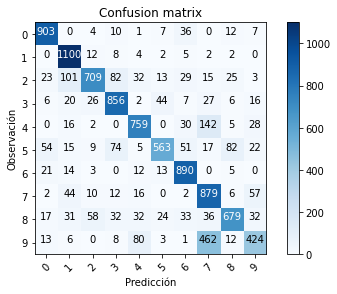

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

En este caso, los elementos de la diagonal representan el número de puntos en que la etiqueta que predice el modelo coincide con el valor real de la etiqueta, mientras que los otros valores nos indican los casos en el que el modelo ha clasificado incorrectamente. Por tanto, cuando más altos son los valores de la diagonal mejor será la predicción. En este ejmplo, si el lector calcula la suma de los valores de la diagonal dividido por el total de valores de la matriz observará que coincide con el accuracy que nos ha retornado el método *evaluate()*

### Generación de predicciones

Finalmente, nos queda el paso de usar el modelo creado en los anteriores
apartados para realizar predicciones sobre qué dígito representan nuevas
imáges. Para ello Keras ofrece el método *predict*() de un modelo que ya ha sido previamente entrenado.

Para probar este método podemos elegir un elemento cualquiera, por
ejemplo uno del conjunto de datos de test *x_test*. Por ejemplo elijamos el
elemento 11 de este conjunto de datos *x_test* y veamos a que clase corresponde
según el modelo entrenado de que disponemos.

Antes vamos a ver la imagen para poder comprobar nosotros mismos si el
modelo está haciendo una predicción correcta (antes de hacer el *reshape*
anterior):

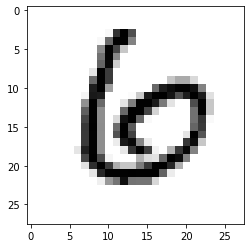

In [ ]:
(x_train2, y_train2), (x_test2,y_test2) = mnist.load_data()
plt.imshow(x_test2[11], cmap=plt.cm.binary)

Ahora comprobemos que el método *predict()* del modelo, ejecutando el siguiente código, nos lo predice correctamente el valor que acabamos de estimar nosotros que debería predecir. Para ello ejecutamos la siguiente línea de código:


In [ ]:
predictions = model.predict(x_test)

Una vez calculado el vector resultado de la predicción para este conjunto de datos podemos saber a qué clase le da más probabilidad de pertenencia mediante la función *argmax* de Numpy, que retorna el índice de la posición que contiene el valor más alto de la función. En concreto, para el elemento 11:

In [ ]:
np.argmax(predictions[11])

6

Podemos comprobar imprimiento el *array*:

In [ ]:
print(predictions[11])

[0.06624642 0.02347942 0.0517231  0.00814946 0.19405992 0.03352341
 0.35972613 0.0465418  0.1496699  0.06688053]


Vemos que nos ha devuelto el índice 6, correspondiente a la clase “6”, la que
habíamos estimado nosotros.
También podemos comprobar que el resultado de la predicción es un vector
cuya suma de todos sus componentes es igual a 1, como era de esperar. Para
ello podemos usar:

In [ ]:
np.sum(predictions[11])

1.0000001



---



---



# Ejercicio completo en una celda

### Imports y funciones necesarias para el problema

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
'''Imports necesarios para la matriz de confusion'''
from collections import Counter
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

## Ejercicio completo

In [ ]:
'''CARGA DE DATOS'''
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

'''RESTRUCTURCION DE DATOS'''

'''Solo le cambiamos el tipo a la x porque la y es la salida'''
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

'''Convertimos la etiqueta de cada ejemplo, en un vector con 10 posiciones'''
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

'''CREACION DEL MODELO'''
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))
model.summary()

'''CONFIGURACION DEL PROCESO DE APRENDIZAJE'''
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

'''ENTRENAMIENTO DEL MODELO'''
model.fit(x_train, y_train, batch_size=100, epochs=5)

'''EVALUACION DEL MODELO'''
test_loss, test_acc = model.evaluate(x_test, y_test)

Model creation
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Start training
Epoch 1/5
600/600 [==============================] - 4s 7ms/step - loss: 32.8335 - accuracy: 0.7328
Epoch 2/5
600/600 [==============================] - 5s 8ms/step - loss: 0.4277 - accuracy: 0.8973
Epoch 3/5
600/600 [==============================] - 4s 7ms/step - loss: 0.3408 - accuracy: 0.9182
Epoch 4/5
600/600 [==============================] - 4s 7ms/step - loss: 0.3211 - accuracy: 0.9247
Epoch 5/5
313/313

### Resultados

Test accuracy: 0.9315999746322632


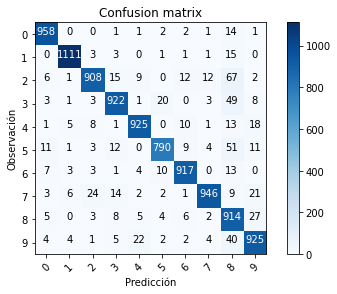

In [ ]:
print('Test accuracy:', test_acc)

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))